<center><img src="../../logo.png" alt="Header" style="width: 800px;"/></center>

@Copyright (C): 2010-2022, Shenzhen Yahboom Tech  
@Author: Liusen  
@Date: 2020-03-10 12:11:02  
@LastEditors: Liusen  
@LastEditTime: 2020-02-18 12:12:02   

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy
import operator
import os
import matplotlib.pyplot as plt


In [2]:
# 将图像数据转换为（1，1024）向量
def img2vector(filename):
    returnVect = numpy.zeros((1, 1024))
    file = open(filename)
    for i in range(32):
        lineStr = file.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [3]:
# kNN分类器
def classifier(inX, dataSet, labels, k):
    #numpy中shape[0]返回数组的行数，shape[1]返回列数
    #MDS降维操作
    dataSetSize = dataSet.shape[0]
    #去逆矩阵
    diffMat = numpy.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后乘方
    sqDiffMat = diffMat ** 2
    #计算距离
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    print ("distances:",distances)
    #返回distance中元素从小到大排序后的索引
    sortedDistIndicies = distances.argsort()
    print ("sortDistance:",sortedDistIndicies)
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [4]:
# 测试手写数字识别代码
def handWritingClassTest(k):
    #训练部分
    hwLabels = []
    trainingFileList = os.listdir('knn-digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = numpy.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  
        try:
            classNumStr = int(fileStr.split('_')[0])
        except Exception as e:
            print('Error:', e)
 
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector("knn-digits/trainingDigits/%s" % fileNameStr)
    
    #测试数据分类结果
    testFileList = os.listdir('knn-digits/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        try:
            classNumStr = int(fileStr.split('_')[0])
        except:
            print(fileStr.split('_')[0])
            continue
        vectorTest = img2vector("knn-digits/testDigits/%s" % fileNameStr)
        result = classifier(vectorTest, trainingMat, hwLabels, k)
        print("分类结果是：%d, 真实结果是：%d" % (result, classNumStr))
        if result != classNumStr:
            errorCount += 1.0
    print("错误总数：%d" % errorCount)
    print("错误率：%f" % (errorCount / mTest))
    return errorCount

In [20]:
# 这里是为了测试取不同的k值，识别的效果如何
def selectK():
    x = list()
    y = list()
    for i in range(1, 5):
        x.append(int(i))
        y.append(int(handWritingClassTest(i)))
    plt.plot(x, y)
    # 由于程序执行时间比较长，这里在程序执行完毕时进行语音提醒（针对Mac，Windows用户去除该行代码）
    os.system("say '程序执行完毕'")
    plt.show()

distances: [14.07124728 12.32882801 18.08314132 ... 16.79285562 16.55294536
 16.2788206 ]
sortDistance: [ 572  297 1752 ... 1558 1738 1270]
分类结果是：4, 真实结果是：4
distances: [14.62873884 16.0623784  13.74772708 ... 16.30950643 16.37070554
 17.11724277]
sortDistance: [1632 1432  115 ... 1270 1854 1215]
分类结果是：5, 真实结果是：5
distances: [18.         18.         16.09347694 ... 19.33907961 14.96662955
 12.76714533]
sortDistance: [1226  599  469 ...  658 1196 1159]
分类结果是：7, 真实结果是：7
distances: [17.1464282  18.33030278 16.21727474 ... 17.20465053 14.62873884
 17.97220076]
sortDistance: [ 941   12  824 ... 1192 1932  200]
分类结果是：5, 真实结果是：5
distances: [19.67231557 19.5192213  16.85229955 ... 15.65247584 16.46207763
 18.92088793]
sortDistance: [ 316 1270 1738 ... 1902 1919   89]
分类结果是：0, 真实结果是：0
distances: [14.03566885 15.32970972 16.61324773 ... 18.57417562 17.11724277
 16.673332  ]
sortDistance: [1708 1025 1828 ... 1738  859 1270]
分类结果是：1, 真实结果是：1
distances: [18.24828759 18.02775638 15.93737745 ... 15.329

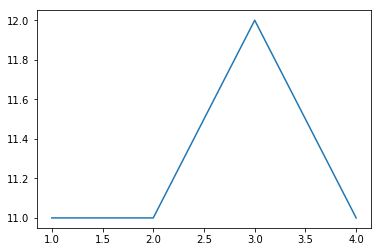

In [22]:
# 开始测试，会生成折线图
selectK()

In [ ]:
# 测试证明，k选3效果比较好，直接用

In [21]:
handWritingClassTest(3)

distances: [14.07124728 12.32882801 18.08314132 ... 16.79285562 16.55294536
 16.2788206 ]
sortDistance: [ 572  297 1752 ... 1558 1738 1270]
分类结果是：4, 真实结果是：4
distances: [14.62873884 16.0623784  13.74772708 ... 16.30950643 16.37070554
 17.11724277]
sortDistance: [1632 1432  115 ... 1270 1854 1215]
分类结果是：5, 真实结果是：5
distances: [18.         18.         16.09347694 ... 19.33907961 14.96662955
 12.76714533]
sortDistance: [1226  599  469 ...  658 1196 1159]
分类结果是：7, 真实结果是：7
distances: [17.1464282  18.33030278 16.21727474 ... 17.20465053 14.62873884
 17.97220076]
sortDistance: [ 941   12  824 ... 1192 1932  200]
分类结果是：5, 真实结果是：5
distances: [19.67231557 19.5192213  16.85229955 ... 15.65247584 16.46207763
 18.92088793]
sortDistance: [ 316 1270 1738 ... 1902 1919   89]
分类结果是：0, 真实结果是：0
distances: [14.03566885 15.32970972 16.61324773 ... 18.57417562 17.11724277
 16.673332  ]
sortDistance: [1708 1025 1828 ... 1738  859 1270]
分类结果是：1, 真实结果是：1
distances: [18.24828759 18.02775638 15.93737745 ... 15.329

12.0